# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле, требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times k$, $V^T$ — ортогональная матрица размера $k\times n$, $\Sigma$ — диагональная матрица размера $k\times k$, причём $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

In [8]:
import numpy as np
from skimage.io import imread
import os
import matplotlib.pyplot as plt
from numpy.linalg import svd
%matplotlib inline

<font color="blue">Вспомогательные функции</font>

In [9]:
def getComponent(n : int) -> np.ndarray:
    """Получить компоненту n-ого ранга"""
    U_n = U[:, range(n - 1, n)]
    S_n = np.diag(S)[(n - 1):n, (n - 1):n]
    VT_n = VT[range(n - 1, n), :]
    A_n = U_n @ S_n @ VT_n
    return A_n



### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [10]:
path1 = 'somepath'
path2 = 'example.bmp'

if os.path.exists(path1):
  img = imread(path1)
elif os.path.exists(path2):
  img = imread(path2)
else:
  print("А где...")


img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

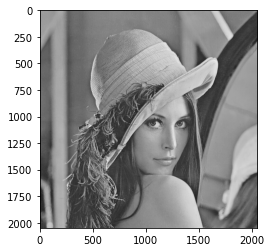

In [11]:
imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [13]:
%%time

U, S, VT = svd(img, full_matrices=False)

CPU times: user 15.9 s, sys: 3.84 s, total: 19.8 s
Wall time: 13.6 s


**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

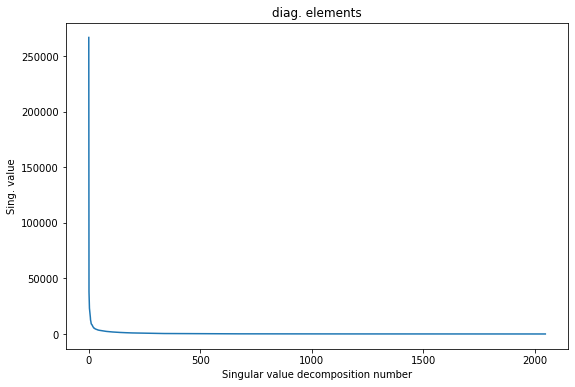

In [14]:
plt.figure(figsize=(9, 6))
plt.title("diag. elements")
plt.plot(S)
plt.xlabel("Singular value decomposition number")
plt.ylabel("Sing. value")
plt.show()

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

<font color="blue"><b>Ответ:</b> Потому что в разложении будет использоваться только первое слагаемое $A = u_1\sigma_{1}v_1^T$ (не хватает для разложения очевидно)

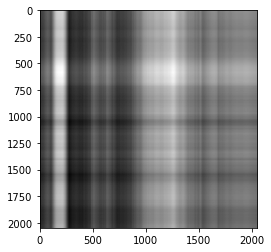

In [15]:
def getComponent(n : int) -> np.ndarray:
    U_n = U[:, range(n - 1, n)]
    S_n = np.diag(S)[(n - 1):n, (n - 1):n]
    VT_n = VT[range(n - 1, n), :]
    A_n = U_n @ S_n @ VT_n
    return A_n

A_1 = getComponent(1)
plt.imshow(A_1, cmap='gray')

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

In [17]:
%%time

A_20 = getComponent(1)
A_50 = A_20.copy()
A_100 = getComponent(20)
A_full = A_100.copy()
for i in range(2, img.shape[0]):
    i_comp = getComponent(i)
    if i < 21:
        A_20 += i_comp
    if i < 51:
        A_50 += i_comp
    if i > 20:
        if i < 101:
            A_100 += i_comp
        A_full += i_comp

CPU times: user 1min 7s, sys: 1.64 s, total: 1min 9s
Wall time: 1min 12s


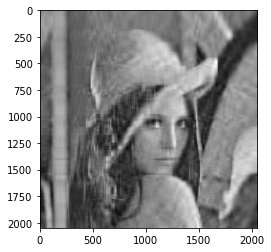

In [18]:
plt.imshow(A_20, cmap='gray')

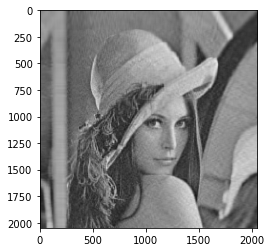

In [19]:
plt.imshow(A_50, cmap='gray')

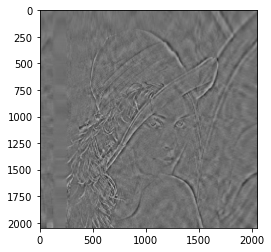

In [20]:
plt.imshow(A_100, cmap='gray')

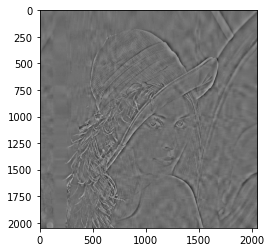

In [21]:
plt.imshow(A_full, cmap='gray')

<font color="blue"><b>Ответ:</b> Посмотрим ещё раз на график диаг. элементов, приблизим левую часть

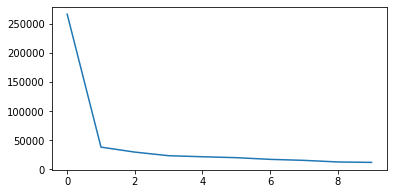

In [26]:
plt.figure(figsize=(6, 3))
plt.plot(S[0:10])
plt.show()

<font color="blue">Наибольшие диаг. элементы находятся слева (визуально - порог 2-8 номер синг. разложения, когда вклад правой части уже не очень). Чем больше мы их возьмем, тем лучше будет качество. Если начинать брать с 20 или 50, то качество будет хуже, т.к. вклад диаг. элементов правее порога существенно ниже. Это мы и видим при прорисовке изображения - где большее количество диаг. элементов, которые находятся левее порога (с макс синг. значением), тем лучше качество изображения

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

<font color="blue"><b>Ответ: </b> Ориентируясь на график выше, нам точно нужно начинать брать компоненты слева, от $1$ до $N$. Вопрос в том, какой N, т.к. с ростом $N $полезность такой компоненты сильно снижается, а расход памяти увеличивается. Мой порог был где-то в районе 10, но если взять в 4 раза больше, тогда нам этого точно должно хватить для хорошего изображения. Можно, конечно, найти какой-то $\epsilon$, начиная с которого сумма $(i+1,...,N)$ компонентов меньше $i$-того компонента, после чего на нём и остановиться, но этого задача не требует

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

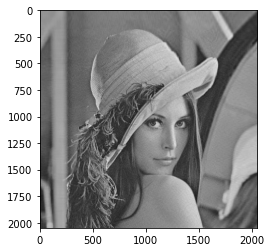

In [27]:
A_ideal = getComponent(1)
for i in range(2, 121):
    A_ideal += getComponent(i)
plt.imshow(A_ideal, cmap='gray')

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

<font color="blue"><b>Ответ: </b> Попробуем посчитать:

<font color="blue">
Размер исходника - $488 \cdot 653$ <br>Наш выбранный ранг - $120$ <br>
Разделим исходник на приближение: $$\frac{488 \cdot 653}{120\cdot(488 + 653 + 1)} $$ <br>
Результат:  около $2.325$ <br>
Кажется, что можно ещё выбить память, если подобрать N по той идее, что я изложил выше, но мы уже в выигрыше

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [28]:
print('Исходная матрица', U.nbytes + S.nbytes + VT.nbytes)
print('Наша', U[:, 0:121].nbytes + S[0:121].nbytes + VT[0:121, :].nbytes)

Исходная матрица 67125248
Наша 3965896


<font color="blue"><b>Ответ: </b> Даже в 4 раза меньше получилось. Наверное, дело в том, как numpy работает дальше с памятью, но самое главное то, что памяти все равно меньше занимается

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


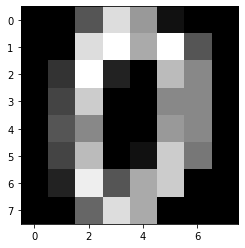

In [29]:
from sklearn import datasets


digits = datasets.load_digits()
data = digits.data
print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)), cmap='gray')

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [30]:
dig_U, dig_S, dig_V_T = svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

<Figure size 1080x1080 with 0 Axes>

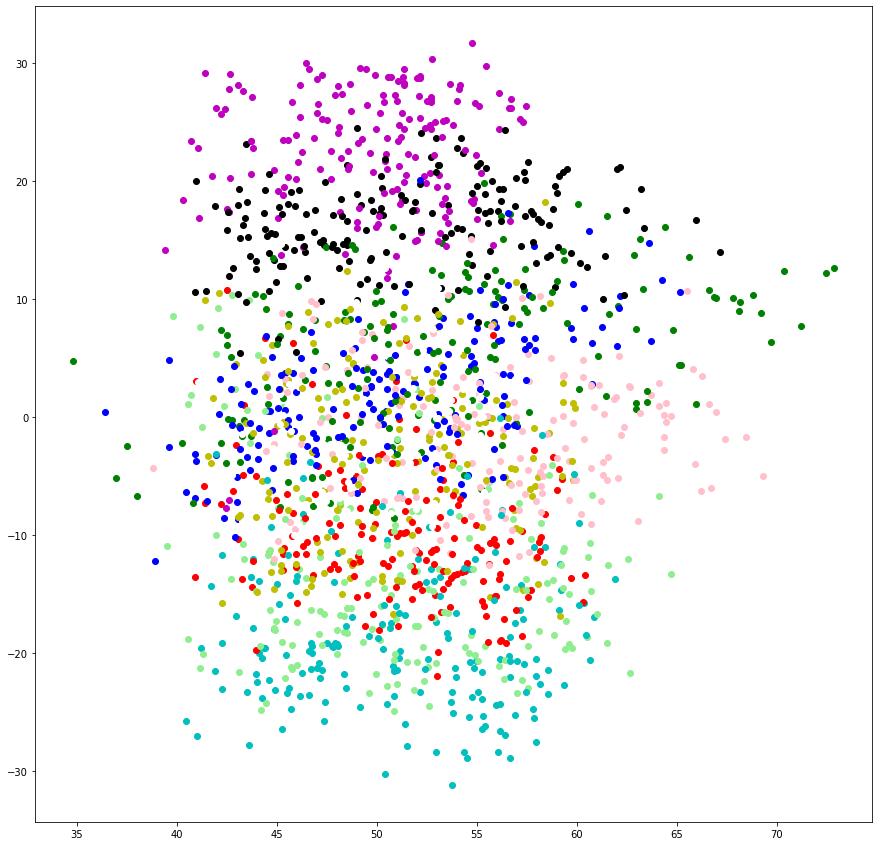

In [31]:
import matplotlib.colors as mcolors
plt.figure(figsize=(15, 15))


dot_U_S = (dig_U @ np.diag(dig_S))[:, [0, 1]]

colors = list(mcolors.BASE_COLORS.keys()) + ['pink', 'lightgreen', 'darkkhaki']
plt.figure(figsize=(15, 15))
for i in range(dot_U_S.shape[0]):
    plt.scatter(dot_U_S[i, 0], dot_U_S[i, 1], color = colors[digits.target[i]])

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

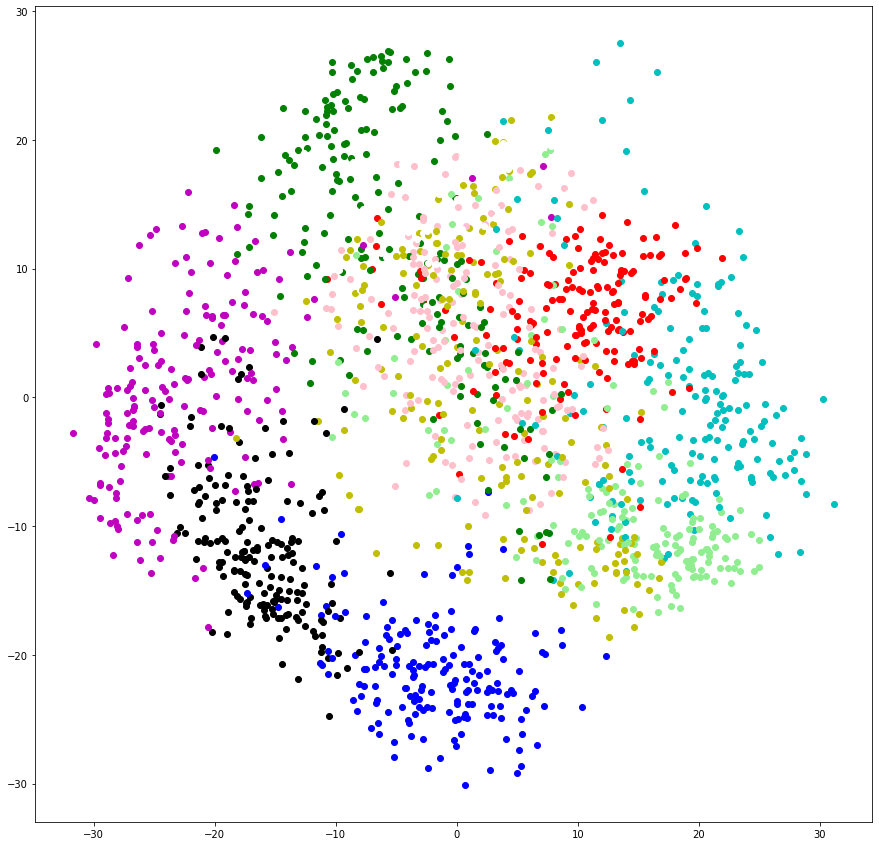

In [32]:
plt.figure(figsize=(15, 15))

for i in range(data[0].shape[0]):
    data[:, i] -= np.average(data[:, i])


dig_U, dig_S, dig_V_T = svd(data, full_matrices=False)
dot_U_S = (dig_U @ np.diag(dig_S))[:, [0, 1]]
for i in range(dot_U_S.shape[0]):
    plt.scatter(dot_U_S[i, 0], dot_U_S[i, 1], color = colors[digits.target[i]])

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

<font color="blue"><b>Ответ: </b>Первое - хаотичное расположение точек (размазаны по плоскости), второе - похоже на формирование класстеров одного класса, можно определить начало координат (в центре между класстерами, близко к друг другу).

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

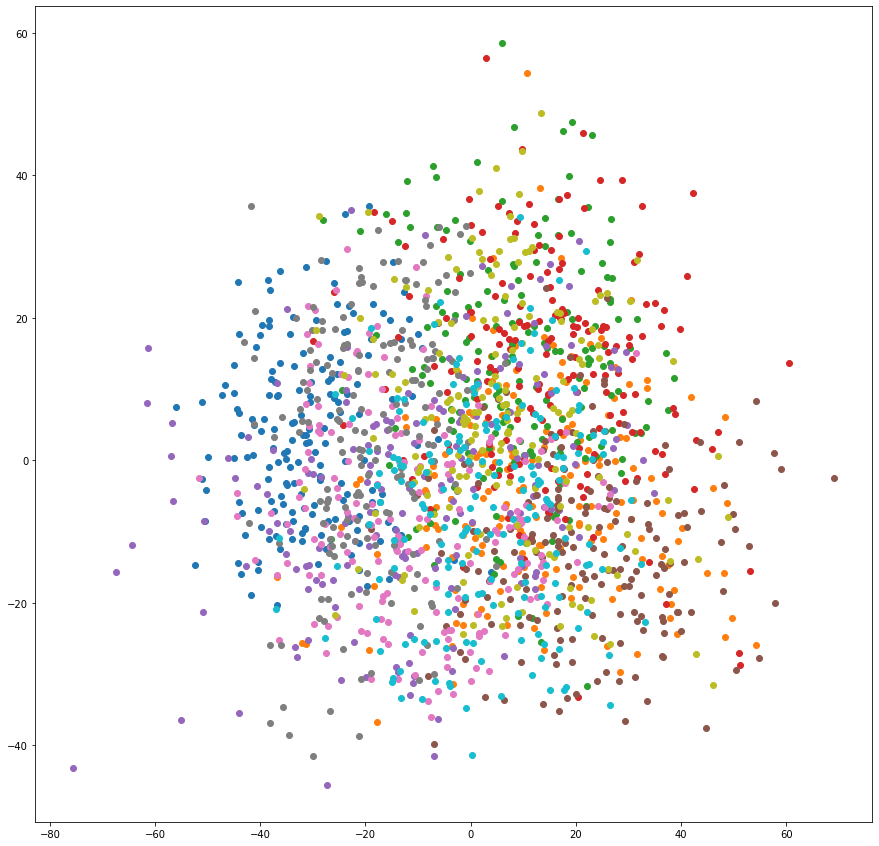

In [33]:
from sklearn.random_projection import GaussianRandomProjection
plt.figure(figsize=(15, 15))


GRP = GaussianRandomProjection(n_components = 2).fit_transform(digits.data)

U, S, VT = svd(GRP, full_matrices=False)

dot_U_S = U @ np.diag(S)
target = digits.target
X, y = [[] for i in range(10)], [[] for i in range(10)]

for i in range(GRP.shape[0]):
    X[target[i]].append(dot_U_S[i, 0])
    y[target[i]].append(dot_U_S[i, 1])

for i in range(10):
    plt.scatter(X[i], y[i])

<font color="blue"><b>Ответ: </b> Кластеры менее заметны

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, я сгененерирую много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построю аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`.

In [34]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

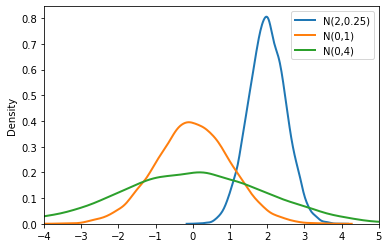

In [35]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

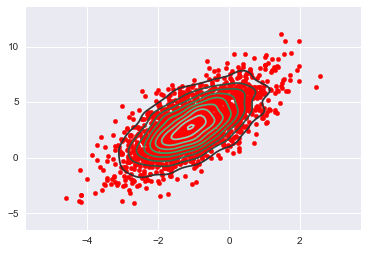

In [ ]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s, shade=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**3. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [36]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
X = np.random.multivariate_normal(mean=np.array([0, 0]), cov=np.array([[1, -2], [-2, 5]]), size=1000)


**4. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 's'
  **contour_kws,


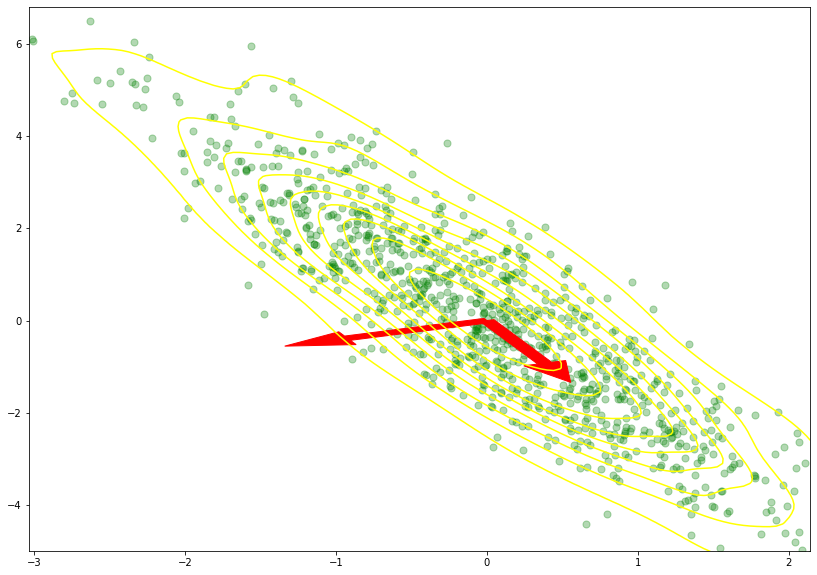

In [37]:
U, S, V_T = svd(X, full_matrices = False)
plt.figure(figsize=(14, 10))
plt.scatter(X[:,0], X[:,1], color='green', s=50, alpha=0.3)
plt.arrow(0, 0, V_T[0, 0], V_T[0, 1],color = 'red',  width = 0.1)
plt.arrow(0, 0, V_T[1, 0], V_T[1, 1],color = 'red',  width = 0.1)
sns.kdeplot(X[:, 0], X[:, 1], shade=False, color='yellow', s=50)
plt.margins(-0.2, -0.2)

**5. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

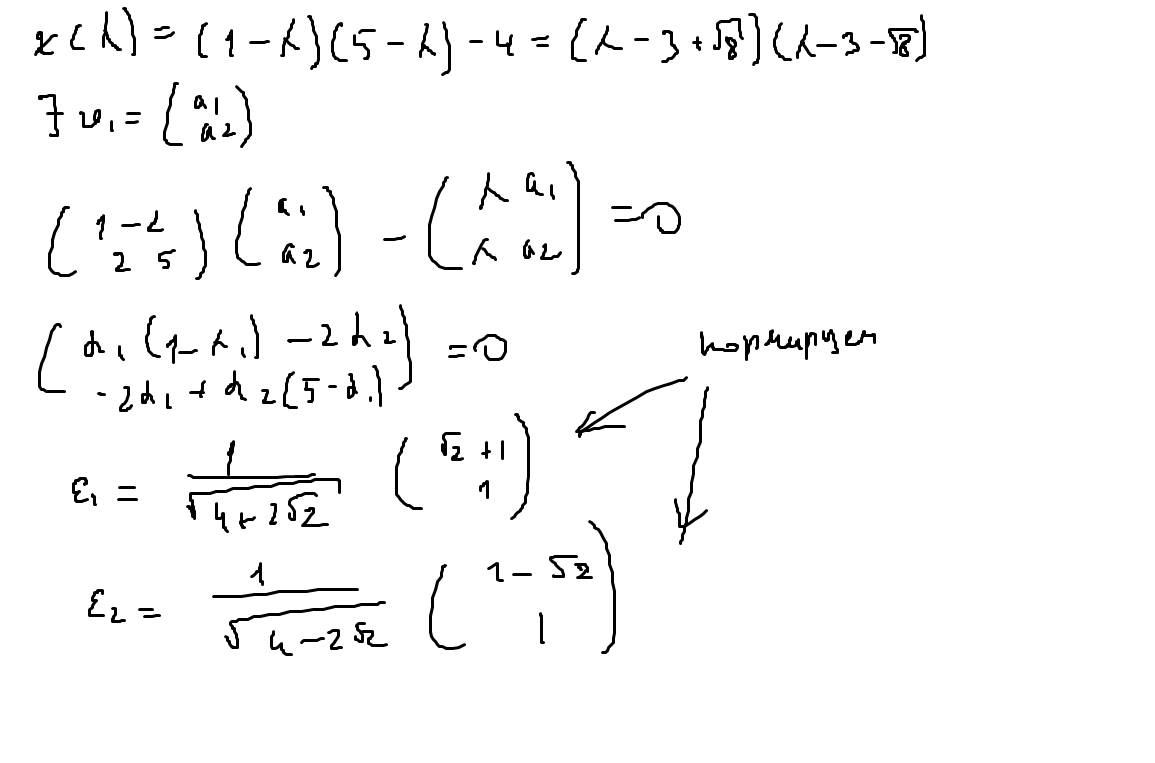

<font color='blue'>Практичечки совпадают с осями

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**6. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


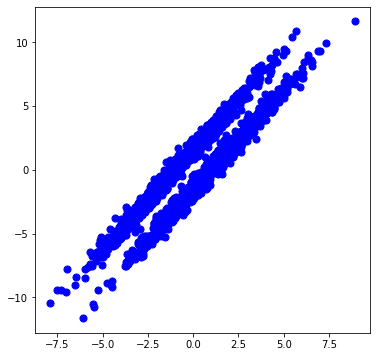

In [38]:
plt.figure(figsize=(6, 6))
sig = np.array([[4.8, 7.65], [7.65, 12]])
A, B = np.random.multivariate_normal(mean=np.array([-1, 0]), cov = sig, size = 1000), np.random.multivariate_normal(mean=np.array([1, 0]), cov = sig, size = 1000)
plt.scatter(A[:, 0], A[:, 1], color='blue', s=50)
plt.scatter(B[:, 0], B[:, 1], color='blue', s=50)

**7. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

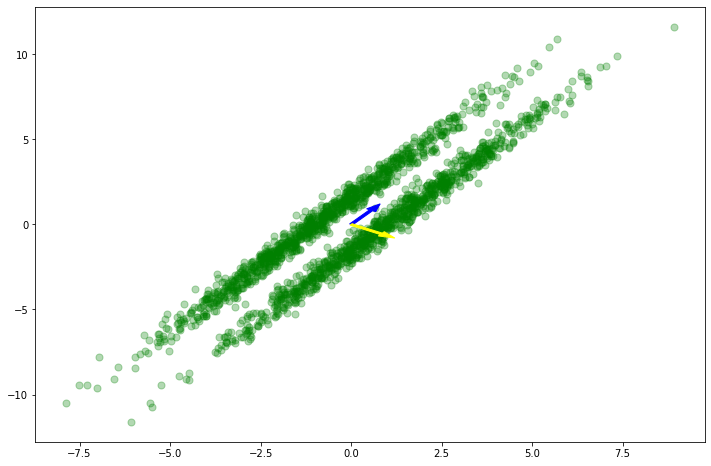

In [39]:
U, S, V_T = svd(X, full_matrices = False)

plt.figure(figsize=(12, 8))
plt.scatter(A[:, 0], A[:, 1], color='green', s=50, alpha=0.3)
plt.scatter(B[:, 0], B[:, 1], color='green', s=50, alpha=0.3)
X = np.concatenate((A, B), axis=0)
U, S, V_T =svd(X, full_matrices=False)
plt.arrow(0, 0, V_T[0, 0], V_T[0, 1],color = 'blue',  width = 0.1)
plt.arrow(0, 0, V_T[1, 0], V_T[1, 1],color = 'yellow',  width = 0.1)

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

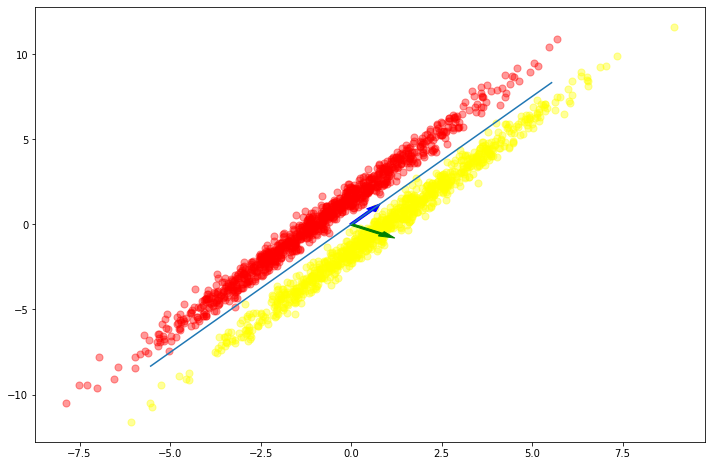

In [40]:
plt.figure(figsize=(12, 8))
plt.scatter(A[:, 0], A[:, 1], color='red', s=50, alpha=0.4)
plt.scatter(B[:, 0], B[:, 1], color='yellow', s=50, alpha=0.4)
plt.arrow(0, 0, V_T[0, 0], V_T[0, 1],color = 'blue',  width = 0.1)
plt.arrow(0, 0, V_T[1, 0], V_T[1, 1],color = 'green',  width = 0.1)
plt.plot([V_T[0, 0] * (-10) , V_T[0, 0] * 10], [V_T[0, 1] * (-10), V_T[0, 1] * 10])

**10. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

<font color='blue'>Элементы независимы, т.к. ковариация у нас ноль, поэтому направления параллельны осям

**11. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 's'
  **contour_kws,


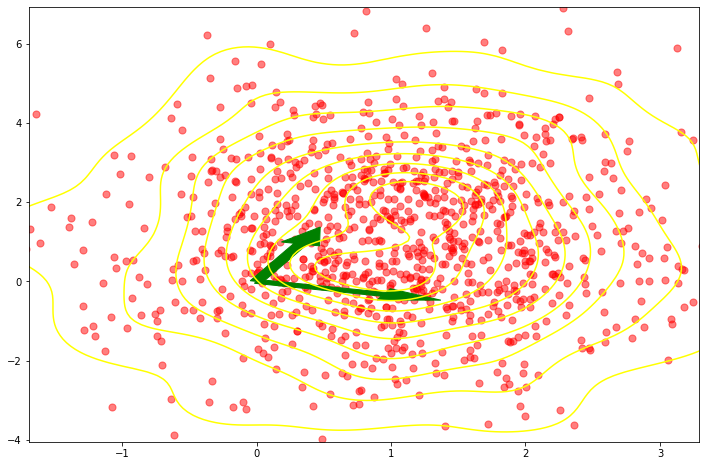

In [41]:
X = np.random.multivariate_normal(mean=np.array([1, 1]), cov=np.array([[1, 0], [0, 4]]), size=1000)
U, S, V_T = svd(X, full_matrices = False)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], color='red', s=50, alpha=0.5)
plt.arrow(0, 0, V_T[0, 0], V_T[0, 1], color = 'green',  width = 0.1)
plt.arrow(0, 0, V_T[1, 0], V_T[1, 1], color = 'green',  width = 0.1)
sns.kdeplot(X[:, 0], X[:, 1], shade=False, color='yellow', s=50)
plt.margins(-0.2, -0.2)